In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from functools import partial

## Problem 2

In [4]:
def return_metrics_one(data):
    result_table = dict()
    result_table["Mean"] = data.mean()
    result_table["Volatility"] = data.std()
    result_table["Sharpe Ratio"] = (
        result_table["Mean"] / result_table["Volatility"])
    result_table["VaR (0.05)"] = data.quantile(0.05, axis=0)
    
    return pd.DataFrame(result_table, index=data.columns)

In [5]:
all_data = partial(pd.read_excel, "/Users/shubhaankargupta/Desktop/FINM25000/factor_pricing_data.xlsx", index_col=0, parse_dates=[0])
df = all_data(sheet_name="factors")

### 2.1

In [6]:
return_metrics_one(df)

,Mean,Volatility,Sharpe Ratio,VaR (0.05)
MKT,0.007079,0.045141,0.156811,-0.072470
SMB,0.000452,0.029262,0.015435,-0.043155
HML,0.002209,0.031439,0.070264,-0.042210
RMW,0.003762,0.023976,0.156890,-0.028485
CMA,0.002307,0.020928,0.110245,-0.027855
UMD,0.005147,0.044318,0.116146,-0.068035


### 2.2

Yes, each factor has a positive return as the mean for all of them is >0.

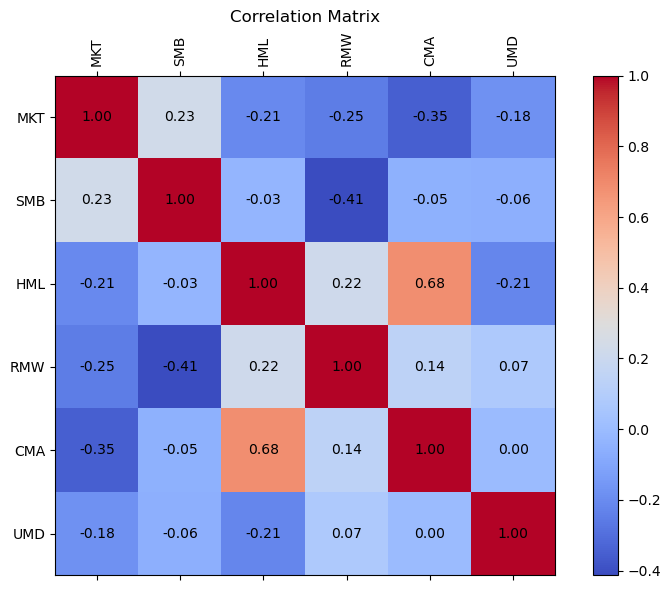

In [59]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='coolwarm')

fig.colorbar(cax)

ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))

ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, f"{corr.iloc[i, j]:.2f}",
                       ha="center", va="center", color="black")

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

**As seen in the correlation matrix, there is a very small (<0.5) or otherwise negative correlation between most factors. Therefore, we can say that they succeeded.**

### 2.3

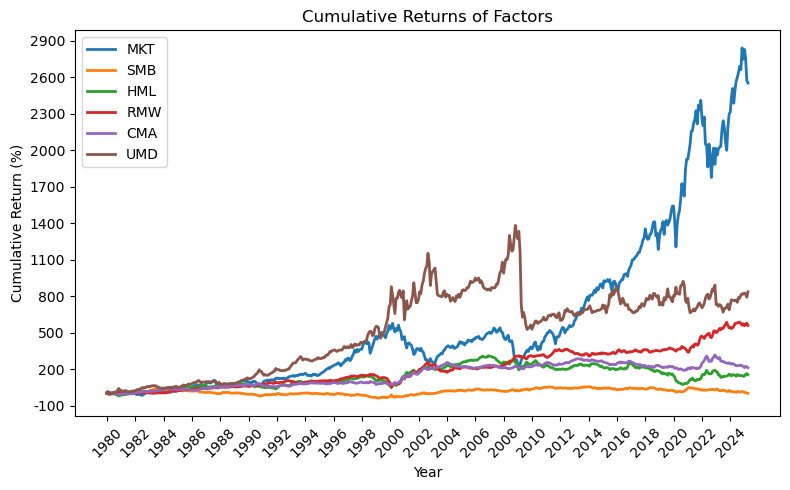

In [8]:
factors_cum = (1 + df).cumprod() - 1

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(factors_cum.index, factors_cum, lw=2)

# Add a legend.
ax.legend(factors_cum.columns, loc="upper left")

# Make xticks every year and format them as years.
ax.set_xticks(factors_cum.index[::24])
ax.set_xticklabels(factors_cum.index[::24].year, rotation=45)
ax.set_yticks(np.arange(-1, 30, 3))
ax.set_yticklabels(["{:d}".format(x * 100) for x in ax.get_yticks()])
ax.set_xlabel("Year")
ax.set_ylabel("Cumulative Return (%)")
ax.set_title("Cumulative Returns of Factors")
fig.tight_layout()

In [9]:
prt = all_data(sheet_name="portfolios")

### 2.4

In [61]:
def return_metrics_annualized(data, arg=12):
    result_table = dict()
    result_table["Annualized Mean"] = data.mean()*arg
    result_table["Annualized Volatility"] = data.std()*arg**0.5
    result_table["Annualized Sharpe Ratio"] = (
        result_table["Annualized Mean"] / result_table["Annualized Volatility"])
    result_table["Annualized VaR (0.05)"] = data.quantile(0.05, axis=0) * (arg ** 0.5)
    
    return pd.DataFrame(result_table, index=data.columns)

res = return_metrics_annualized(prt)
display(res)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,Annualized VaR (0.05)
Agric,0.090492,0.216219,0.418519,-0.306815
Food,0.091434,0.149871,0.610083,-0.207725
Soda,0.107166,0.218976,0.489398,-0.321815
Beer,0.106462,0.170226,0.625419,-0.230536
Smoke,0.139915,0.223470,0.626101,-0.317537
Toys,0.058412,0.246793,0.236683,-0.370070
Fun,0.123368,0.265573,0.464537,-0.378661
Books,0.068678,0.206901,0.331936,-0.299420
Hshld,0.077151,0.153228,0.503504,-0.235697
Clths,0.087042,0.226623,0.384083,-0.352143


In [15]:
import statsmodels.api as sm

X = res[['Annualized Volatility', 'Annualized VaR (0.05)']]
X = sm.add_constant(X)

y = res['Annualized Mean']

model = sm.OLS(y, X).fit()

display(model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Annualized Mean   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     4.842
Date:                Sun, 06 Jul 2025   Prob (F-statistic):             0.0123
Time:                        18:02:37   Log-Likelihood:                 126.90
No. Observations:                  49   AIC:                            -247.8
Df Residuals:                      46   BIC:                            -242.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1101      0.012      8.888      0.000       0.085       0.135
Annualized Volatility     0.5654      0.227      2.495      0.016       0.109       1.021
Annualized VaR (0.05)     0.4471      0.156      2.858      0.006       0.132       0.762
==============================================================================
Omnibus:                        2.520   Durbin-Watson:                   2.495
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                1.606
Skew:                           0.394   Prob(JB):                        0.448
Kurtosis:                       3.408   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**They can be explained by both their volatility and VaR (0.05)**

## Problem 3

### 3.1 and 3.2

In [63]:
returns_mkt = df['MKT']

results = []

for i in range(12):
    y = prt.iloc[:, i]
    X = sm.add_constant(returns_mkt)
    model = sm.OLS(y, X).fit()
    
    alpha = model.params['const']
    beta = model.params[returns_mkt.name]
    residuals = model.resid
    sigma_e = np.std(residuals, ddof=1)
    mean_return = np.mean(y)
    T = len(y)
    
    treynor = mean_return / beta
    alpha_adj = alpha * np.sqrt(T)
    info_ratio = alpha / sigma_e
    
    results.append({
        "Asset": i+1,
        "Beta": beta,
        "Treynor Ratio": treynor,
        "Adj Alpha": alpha_adj,
        "Information Ratio": info_ratio
    })


df_results = pd.DataFrame(results)
display(df_results)

display(df_results.mean()[1::])

,Asset,Beta,Treynor Ratio,Adj Alpha,Information Ratio
0,1,0.796025,0.009473,0.044460,0.037350
1,2,0.575366,0.013243,0.082722,0.102503
2,3,0.696773,0.012817,0.093255,0.072919
3,4,0.625208,0.014190,0.103703,0.110528
4,5,0.611540,0.019066,0.170979,0.125729
5,6,1.110894,0.004382,-0.069878,-0.059205
6,7,1.302473,0.007893,0.024745,0.021564
7,8,1.072299,0.005337,-0.043553,-0.053367
8,9,0.687143,0.009356,0.036506,0.049634
9,10,1.084627,0.006688,-0.009895,-0.009777


Beta                 0.866456
Treynor Ratio        0.009878
Adj Alpha            0.039360
Information Ratio    0.037597
dtype: float64

### 3.3

**The Treynor ratios should be about equal since all assets lie on the Security Market Line. The alpha and information ratio in an ideal scenario would be 0, or otherwise very close to 0.**

### 3.4

In [68]:
df_results["MAE"] = 0.0

for i in range(1, 13):
    mae_i = df_results["Adj Alpha"].abs().iloc[:i].mean()
    df_results.at[i-1, "MAE"] = mae_i

display(df_results)

,Asset,Beta,Treynor Ratio,Adj Alpha,Information Ratio,MAE
0,1,0.796025,0.009473,0.044460,0.037350,0.044460
1,2,0.575366,0.013243,0.082722,0.102503,0.063591
2,3,0.696773,0.012817,0.093255,0.072919,0.073479
3,4,0.625208,0.014190,0.103703,0.110528,0.081035
4,5,0.611540,0.019066,0.170979,0.125729,0.099024
5,6,1.110894,0.004382,-0.069878,-0.059205,0.094166
6,7,1.302473,0.007893,0.024745,0.021564,0.084249
7,8,1.072299,0.005337,-0.043553,-0.053367,0.079162
8,9,0.687143,0.009356,0.036506,0.049634,0.074422
9,10,1.084627,0.006688,-0.009895,-0.009777,0.067969


**These alpha estimates are relatively large, and consequently give a high MAE. Therefore, the pricing model may not be working the best.**

## Problem 4

In [69]:
alphas = []
r_squared = []

factors_df = df[['MKT', 'SMB', 'HML', "UMD"]]

for i in prt.keys()[:12:]:
    y = prt[i]
    X = sm.add_constant(factors_df)  # Adds intercept
    model = sm.OLS(y, X).fit()
    
    alphas.append(model.params['const'])
    r_squared.append(model.rsquared)

# Create summary DataFrame
import pandas as pd
df_summary = pd.DataFrame({
    'Asset': range(1, 13),
    'Alpha': alphas,
    'R_squared': r_squared
})

# Calculate MAE of alphas
df_summary["MAE"] = 0.0

for i in range(1, 13):
    mae_i = df_summary["Alpha"].abs().iloc[:i].mean()
    df_summary.at[i-1, "MAE"] = mae_i

display(df_summary)


,Asset,Alpha,R_squared,MAE
0,1,0.000984,0.359185,0.000984
1,2,0.002174,0.413750,0.001579
2,3,0.003391,0.277489,0.002183
3,4,0.003142,0.366912,0.002423
4,5,0.005935,0.231940,0.003125
5,6,-0.001819,0.537074,0.002907
6,7,0.003092,0.616750,0.002934
7,8,-0.002162,0.694687,0.002837
8,9,0.000955,0.511518,0.002628
9,10,0.000399,0.585434,0.002405


**Compared to the previous problem, the alphas here are much closer to 0, and so there is a smaller mean error for each regression. This pricing model is therefore more valid.**